# mplfinanceライブラリを用いた株価オシレーター分析（Blogデモ）

オシレーターが理論的な上限値(下限値)や経験的な上限域(下限域)に接近あるいは上側(下側)の基準値を超えたら買われすぎ(売られすぎ)シグナルと判断する。

順張りではオシレーターが基準値を超えた(割った)後基準値を割ったら(上回ったら)〔逆張りでは単に基準値を超えたら(割ったら)〕、買い(売り)を手じまい、新規に売り(買い)建てる。

ただし上昇(下降)の勢いが強いとオシレーターが買われすぎ(売られすぎ)の領域に張り付くため、逆張りは注意が必要。

上昇トレンドに入ってしばらく経過し安定的に上昇している場面でオシレーターが上限値を上回ったら逆張りのシグナルとしてもよい。

〔内容要確認〕下降(上昇)トレンドが長く続いた後など、トレンド転換の可能性がある場面で、買われすぎ(売られすぎ)シグナルが出た時の逆張りには注意が必要。価格が底入れして(天井をつけて)上昇(下降)トレンドに転じる場面では、買われすぎ(売られすぎ)シグナルが出ることが多い。

中心線よりも下(上)にあったオシレーターが中心線を上回れば(下回れば)トレンドが上昇(下降)に転じたと示唆されるので、順張りの買い(売り)シグナルとなる。

In [1]:
# ライブラリのインポート
import pandas as pd
from pandas_datareader import data as pdr
import mplfinance as mpf
import datetime
import yfinance as yf
import talib as ta
# Yahoo! Financeからのデータ獲得
start = "2023-2-28"
end = datetime.date.today()
ticker = "4755.T" # 4755は楽天グループ
yf.pdr_override()
# yahooサイトからデータをダウンロード
df = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


## 商品チャンネル指数 (CCI)

【CCI解説】ティピカル値で計算した移動平均乖離幅を過去の移動平均乖離幅と比較したもの。

CCIが+100(-100)を上回った(下回った)時に買い仕掛け(空売り仕掛け)、+100(-100)を下回った(上回った)時に買い玉を手じまい(売り玉を精算)

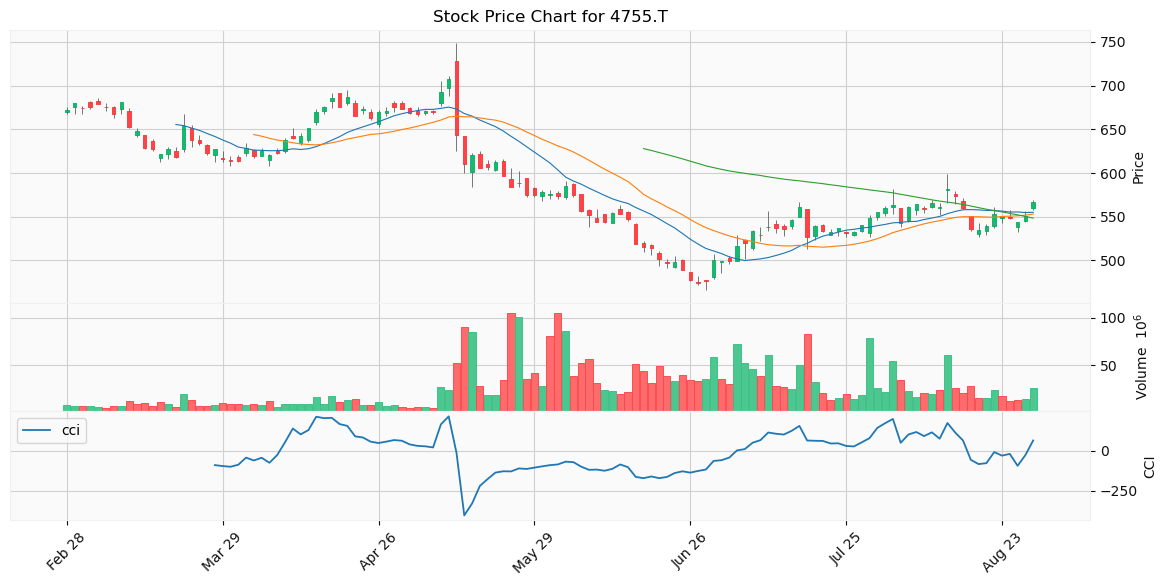

In [2]:
# subplotとして商品チャンネル指数(CCI)を描画する
# 各種指標の計算関数
def OSC_CCI(df, window):
  osc_cci = pd.DataFrame()
  # 商品チャンネル指数 (ta-lib)
  osc_cci['cci'] = ta.CCI(df['High'], df['Low'], df['Close'], timeperiod=window)
  return osc_cci
# 指標計算関数を実行して結果をデータフレームに格納する
osc_cci = OSC_CCI(df, 20)
# 追加プロットのリストを作成する
osc_plot = [
    mpf.make_addplot((osc_cci['cci']), panel=2, ylabel='CCI', secondary_y=False)
]
# 表題と凡例
ch_title = 'Stock Price Chart for ' + ticker
line_titles1 = ['cci']
# チャート描画
fig, axes = mpf.plot(df,type='candle',figsize =(15,7), style='yahoo',
         addplot=osc_plot,volume=True,mav=(15,25,75), returnfig=True)
# 表題と凡例の指定
axes[0].set_title(ch_title)
axes[4].legend(line_titles1)

【CCI解説】ティピカル値で計算した移動平均乖離幅を過去の移動平均乖離幅と比較したもの。

CCIが+100(-100)を上回った(下回った)時に買い仕掛け(空売り仕掛け)、+100(-100)を下回った(上回った)時に買い玉を手じまい(売り玉を精算)